Autor:Sergio Donis Ebri
Correo: s.donis@alumnos.upm.es

# IMPORTANTE
LEER ANTES EL PDF
Es necesario para ejecutar correctamente el programa, descomentar el problema con su coste optimo que se quiera probar. Tambien es necesario tener el problema en local. Los archivos se pueden descargar del siguiente link:

http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/

In [ ]:
#http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random
from copy import deepcopy
#https://buildmedia.readthedocs.org/media/pdf/tsplib95/latest/tsplib95.pdf

In [ ]:
pip install tsplib95

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tsplib95
import tsplib95.loaders 

problema=tsplib95.load_problem('./ulysses16.tsp')#6859
pathoptimo=[1, 14, 13, 12, 7, 6, 15, 5, 11, 9, 10, 16, 3, 2, 4, 8]
costeoptimo=6859

#problema=tsplib95.load_problem('./ulysses22.tsp')#7013
#pathoptimo=[1, 8, 18, 4, 22, 17, 2, 3, 16, 21, 20, 19, 10, 9, 11, 5, 15, 6, 7, 12, 13, 14]
#costeoptimo=7013

#problema=tsplib95.load_problem('./gr202.tsp')#40160
#costeoptimo=40160

#problema=tsplib95.load_problem('./tsp225.tsp')#3845
#costeoptimo=3845 

#problema=tsplib95.load_problem('./a280.tsp')#2578
#costeoptimo=2578 

#problema=tsplib95.load_problem('./pcb442.tsp')#
#costeoptimo=50778

#problema=tsplib95.load_problem('./gr666.tsp')
#costeoptimo=294358


<ipython-input-10-dd8adfd3f7b1>:4: DeprecationWarning: Call to deprecated function (or staticmethod) load_problem. (Will be removed in newer versions. Use `tsplib95.load` instead.) -- Deprecated since version 7.0.0.
  problema=tsplib95.load_problem('./ulysses16.tsp')#6859


In [ ]:
#problema=tsplib95.load_problem('./berlin52.tsp')#40160
#costeoptimo=7542
#pathoptimo=[1,49,32,45,19,41,8,9,10,43,33,51,11,52,14,13,47,26,27,28,12,25,4,6,15,5,24,48,38,37,40,39,36,35,34,44,46,16,29,50,20,23,30,2,7,42,21,17,3,18,31,22]
#problema.trace_tours([pathoptimo])

In [ ]:
#PARAMETROS
NUM_Luci=11
NUM_Mut=11
Iter=8000

In [ ]:
G = problema.get_graph()
problema.trace_canonical_tour()

9665

In [ ]:
#clase luciernaga. 
#tiene dos componentes, el camino y su coste
class Luciernaga:
  
    def __init__(self, path):
        self.path = path   
        aux=problema.trace_tours([self.path])
        self.coste=aux[0]

    def __repr__(self):
        print("La luciernaga actual es")
        print(self.path)
        print("con coste de ")
        aux=problema.trace_tours([self.path])
        print(aux)
        print("y es optimo en un")
        self.coste=aux[0]
        print(costeoptimo/self.coste*100)
        print("")
        return ""


        

In [ ]:
#calcula el numero de arcos diferentes entre dos luciernagas. 
#NO usado en el algortimo final
def arc_dis(luci1,luci2):
  diferencias=0
  luci1pairs=list(zip(luci1.path[0:],luci1.path[1:]))
  luci2pairs=list(zip(luci2.path[0:],luci2.path[1:]))
  difarcs1=[]
  difarcs2=[]
  for e in luci1pairs:
    if e not in luci2pairs:
      difarcs1.append(e)
      diferencias+=1
  for e in luci2pairs:
    if e not in luci1pairs:
      difarcs2.append(e)
  #diferencias=diferencias/len(luci1pairs)*10
  np.random.shuffle(difarcs1)
  np.random.shuffle(difarcs2)
  return (diferencias,difarcs1,difarcs2)

In [ ]:
#mutacion inversa de tamaño r
def inversemut(luci1,r):
  luciaux=deepcopy(luci1)
  tam=r
  if(tam<2):
    tam=2

  if(tam>=len(luci1.path)):
    tam=len(luci1.path)-1
    
  primindice=random.randrange(0, len(luci1.path)-tam+1, 1)

  aux=luciaux.path[primindice:primindice+tam]
  luciaux.path[primindice:primindice+tam]=aux[::-1]
  return luciaux

In [ ]:
#mutacion inversa de tamaño aleatorio, entre 2 y r
def inversemutrandom(luci1,r):
  luciaux=deepcopy(luci1)
  tam=random.randrange(2, r+1, 1)
  if(tam<2):
    tam=2
  if(tam>=len(luci1.path)):
    tam=len(luci1.path)-1

  primindice=random.randrange(0, len(luci1.path)-tam+1, 1)

  aux=luciaux.path[primindice:primindice+tam]
  luciaux.path[primindice:primindice+tam]=aux[::-1]
  return luciaux

In [ ]:
#funcion que mueve una luciernaga a otra
from numpy.lib import index_tricks
def moveLuci(luci1,luci2):
  luciaux=deepcopy(luci1)
  numarcs,difarcs1,difarcs2=arc_dis(luci1,luci2)
  #simplemente voy a copiar el primero de la lista
  #esto solo lo voy a hacer si el numero de arcos diferentes es 3 o mas.
  #si hay dos arcos diferntes, en realidad estas copiando y si lo hacercas mas se convierten 
  #en el mismo 
  if numarcs>2:
    primero=difarcs1[0][0]
    indexprimero=luci2.path.index(primero)

    if indexprimero==(len(luci1.path)-1):
      indexprimero=0

    numprimero=deepcopy(difarcs1[0][1])
    numsegundo=deepcopy(luci2.path[indexprimero+1])

    indexprimero=luci1.path.index(numprimero)
    indexsegundo=luci1.path.index(numsegundo)
    #print("el ",numprimero," esta en el indice",indexprimero)
    #print("el ",numsegundo," esta en el indice",indexsegundo)
    luciaux.path[indexprimero]=numsegundo
    luciaux.path[indexsegundo]=numprimero
    luciaux.coste=problema.trace_tours([luciaux.path])[0]
  else:
    mov1=deepcopy(luci1)
    mov1=inversemutrandom(mov1,52)
    mov1.coste=problema.trace_tours([mov1.path])[0]
    luciaux=mov1
  return luciaux

In [ ]:
#imprimir visualmente el camino de una luciernaga
def printluci(luci):
  x=[]
  y=[]
  for i in range(len(luci.path)):
   
    x.append(G.nodes[luci.path[i]]["coord"][0])
    y.append(G.nodes[luci.path[i]]["coord"][1])

  #cierro el camino
  x.append(G.nodes[luci.path[0]]["coord"][0])
  y.append(G.nodes[luci.path[0]]["coord"][1])

  plt.plot(x,y,"o")
  plt.plot(x,y)
  return

In [ ]:
# es muy dificil mutar las los extremos, asi que movemos todas las posiciones: 1,2,3,4,5,6->. 3,4,5,6,1,2
#sigue siendo el mismo camino.P
#Pero esto es necesario por el sesgo que tiene la mutacion implementada
def avanzar20(luci1):
  path=luci1.path[20:]
  for z in luci1.path[0:20]:
    path.append(z)
  return path

In [ ]:
#generamos la poblacion inicial


In [ ]:
pathbase=[]
poblacion=[]
poblaciongrande=[]

for i in range (len(G.nodes)):
  pathbase.append(i+1)
print(pathbase)
print("Ahora vamos a ver si los dos toura sson iguales")
print("si lo son es que el camino va bien")
print(problema.trace_canonical_tour())
print(problema.trace_tours([pathbase])[0])
print("")
print("")
for i in range (NUM_Luci):
  np.random.shuffle(pathbase)
  print(pathbase)
  luci=Luciernaga(pathbase)
  poblacion.append(luci)
  pathbase=deepcopy(pathbase)



[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
Ahora vamos a ver si los dos toura sson iguales
si lo son es que el camino va bien
9665
9665


[3, 7, 4, 2, 15, 5, 12, 14, 1, 13, 6, 8, 10, 11, 16, 9]
[2, 3, 12, 10, 16, 14, 13, 5, 11, 7, 8, 6, 15, 1, 9, 4]
[1, 2, 4, 14, 6, 16, 11, 3, 9, 13, 7, 5, 10, 12, 15, 8]
[11, 7, 10, 15, 5, 2, 1, 4, 8, 12, 13, 3, 6, 14, 16, 9]
[2, 1, 10, 15, 9, 12, 14, 13, 3, 5, 7, 6, 8, 11, 16, 4]
[15, 3, 8, 4, 2, 6, 10, 5, 12, 1, 14, 11, 9, 16, 7, 13]
[8, 4, 13, 11, 12, 10, 1, 15, 9, 6, 16, 14, 5, 2, 7, 3]
[3, 11, 13, 14, 9, 5, 6, 2, 10, 16, 1, 7, 12, 4, 8, 15]
[1, 3, 15, 10, 11, 9, 5, 13, 7, 8, 14, 2, 6, 16, 4, 12]
[7, 4, 16, 13, 14, 9, 5, 10, 11, 1, 8, 6, 12, 3, 2, 15]
[8, 5, 7, 1, 10, 12, 6, 14, 13, 3, 16, 2, 11, 9, 15, 4]


In [ ]:
print(costeoptimo)

6859


In [ ]:
import time
inicio = time.time()
Iter=2000
NUM_Luci=11
mejorluci=[]
itermejorluci=[]
mejorcoste=poblacion[0].coste
itermejorcoste=0
for i in range(Iter):
  poblaciongrande=[]
  poblaciongrande.append(poblacion[0])
      
  #poblaciongrande=[]

  for j in range(len(poblacion)):
   #la luci1 es mejor que luci2 
    #print("en la vez numero ",j)
    luci1=deepcopy(poblacion[j])

    for k in range (len(poblacion)-j-1):#la 0 se compara con 1->10
                    #la 1 se compara con 2->10
                    #la 2 se compara con 3->10
                    #eso es k+j
      #print("j es ",j," k es ",k," j+k es ",j+k+1)
      luci2=deepcopy(poblacion[j+k+1])
      
      #hay que mover todas , la primera random y la segunda hasta la primera
      mov1=deepcopy(luci1)
      mov1=inversemutrandom(mov1,16)#IMPORTANTE CAMBIAR CADA VEZ, depende del problema
      mov1.coste=problema.trace_tours([mov1.path])[0]
      if (mov1.coste not in [p.coste for p in poblaciongrande]):#evitamos que se repitan
        poblaciongrande.append(mov1)
      

      #movemos la luciernaga menos brillante a la que mas
      mov2=moveLuci(luci2,luci1)
      if (mov2.coste not in [p.coste for p in poblaciongrande]):
        poblaciongrande.append(mov2)

      
  
  poblaciongrande.sort(key=lambda x: x.coste, reverse=False)

  #para las graficas
  poblacion=deepcopy(poblaciongrande[0:NUM_Luci])
  if i%100==0:
    mejorluci.append(poblacion[0].coste)
    itermejorluci.append(i)
    if (poblacion[0].coste<mejorcoste):
      mejorcoste=poblacion[0].coste
      itermejorcoste=i

  #cada 400, movemos todos los caminos 20 hacia la derecha
  #e imprimos el coste de la mejorluciernaga    
  if i%400==0:  
    print(i)
    print(poblacion[0].coste)
    pob=[]
    for e in poblacion:
      e.path=deepcopy(avanzar20(e))
      #e.coste=problema.trace_tours([e.path])
      pob.append(e)
    poblacionactual=deepcopy(pob)

  #si lo encontramos
  if ((poblacion[0].coste-costeoptimo)<0.0001):
    print("encontrado")
    print(i)
    break
fin = time.time()
print(fin-inicio)
print("iter ",itermejorcoste," del mejor coste",mejorcoste)

0
10685
encontrado
36
1.4155137538909912
iter  0  del mejor coste 10685


In [ ]:
print(i)

36


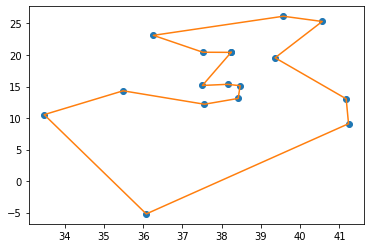

In [ ]:
printluci(Luciernaga(pathoptimo))


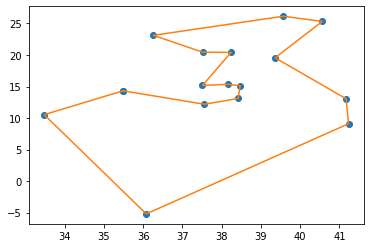

In [ ]:
printluci(poblacion[0])


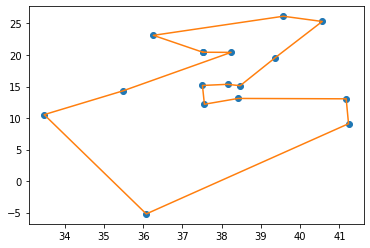

In [ ]:
printluci(poblacion[1])

In [ ]:
poblacion


La luciernaga actual es
[15, 5, 11, 9, 10, 16, 3, 2, 4, 8, 1, 14, 13, 12, 7, 6]
con coste de 
[6859]
y es optimo en un
100.0

La luciernaga actual es
[8, 1, 15, 5, 11, 9, 10, 7, 6, 14, 13, 12, 16, 3, 2, 4]
con coste de 
[6870]
y es optimo en un
99.83988355167395

La luciernaga actual es
[1, 4, 2, 3, 16, 12, 13, 14, 6, 7, 10, 9, 11, 5, 15, 8]
con coste de 
[6890]
y es optimo en un
99.5500725689405

La luciernaga actual es
[15, 5, 11, 9, 10, 6, 7, 14, 13, 12, 16, 3, 2, 4, 8, 1]
con coste de 
[6907]
y es optimo en un
99.30505284493991

La luciernaga actual es
[1, 15, 5, 11, 9, 10, 7, 6, 12, 13, 14, 16, 3, 2, 4, 8]
con coste de 
[6912]
y es optimo en un
99.2332175925926

La luciernaga actual es
[8, 15, 5, 11, 9, 10, 6, 7, 14, 13, 12, 16, 3, 2, 4, 1]
con coste de 
[6927]
y es optimo en un
99.01833405514652

La luciernaga actual es
[15, 5, 11, 9, 10, 7, 6, 12, 13, 14, 16, 3, 2, 4, 1, 8]
con coste de 
[6932]
y es optimo en un
98.94691286785921

La luciernaga actual es
[15, 5, 11, 9, 10, 7, 6,

[, , , , , , , , , , ]

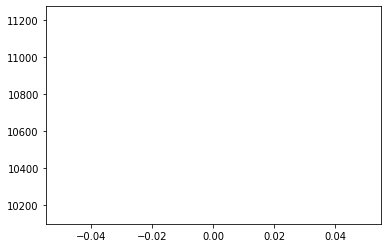

In [ ]:
plt.plot(itermejorluci,mejorluci)
